<a href="https://colab.research.google.com/github/LxYuan0420/eat_tensorflow2_in_30_days/blob/master/notebooks/1_1_Example_Modeling_Procedure_for_Structured_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [32]:
%cd "/gdrive/MyDrive/Colab Notebooks/git/eat_tensorflow2_in_30_days/notebooks"

/gdrive/MyDrive/Colab Notebooks/git/eat_tensorflow2_in_30_days/notebooks


**1. Data Preparation**

The purpose of the Titanic dataset is to predict whether the given passengers could be survived after Titinic hit the iceburg, according to their personal information.

We usually use DataFrame from the pandas library to pre-process the structured data.



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [55]:
dftrain_raw = pd.read_csv("../data/titanic/train.csv")
dftest_raw = pd.read_csv("../data/titanic/test.csv")

dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


Introduction of each field：

- Survived: 0 for death and 1 for survived [y labels]
Pclass: Class of the tickets, with three possible values (1,2,3) [converting to one-hot encoding]
- Name: Name of each passenger [discarded]
- Sex: Gender of each passenger [converting to bool type]
- Age: Age of each passenger (partly missing) [numerical feature, should add "Whether age is missing" as auxiliary feature]
- SibSp: Number of siblings and spouse of each passenger (interger) [numerical feature]
- Parch: Number of parents/children of each passenger (interger) [numerical feature]
- Ticket: Ticket number (string) [discarded]
- Fare: Ticket price of each passenger (float, between 0 to 500) [numerical feature]
- Cabin: Cabin where each passenger is located (partly missing) [should add "Whether cabin is missing" as auxiliary feature]
- Embarked: Which port was each passenger embarked, possible values are S、C、Q (partly missing) [converting to one-hot encoding, four dimensions, S,C,Q,nan]

Use data visualization in pandas library for initial EDA (Exploratory Data Analysis).
 
Survival label distribution:

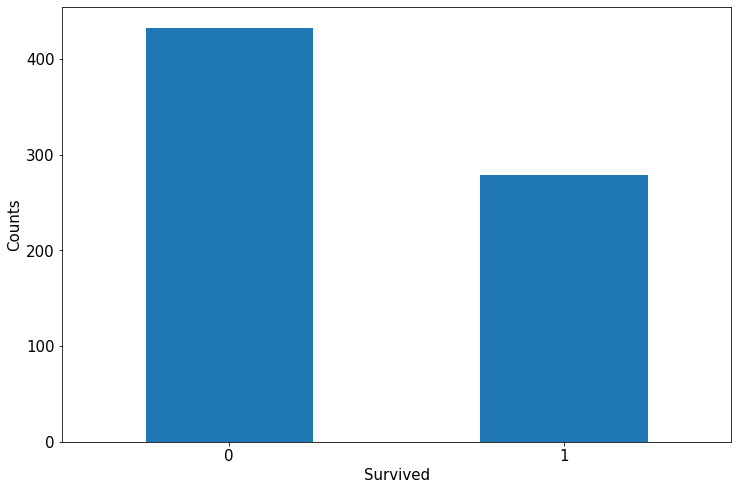

In [35]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar', figsize=(12, 8), fontsize=15, rot=0)
ax.set_ylabel("Counts", fontsize=15)
ax.set_xlabel("Survived", fontsize=15)
plt.show()

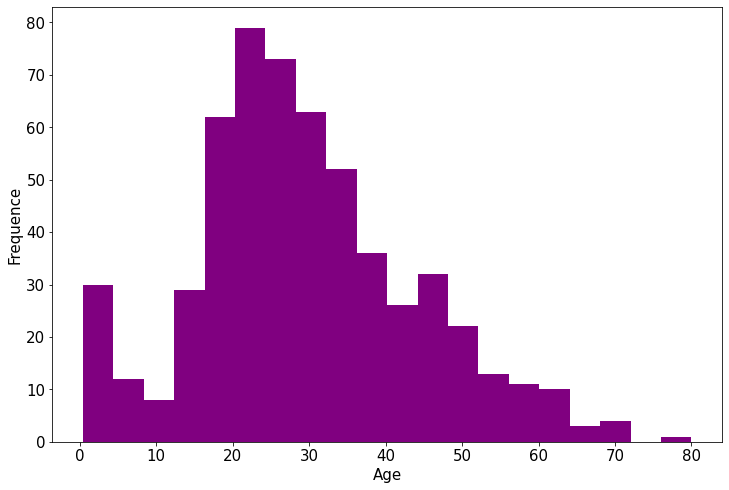

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

ax = dftrain_raw['Age'].plot(kind='hist', bins=20, color='purple', figsize=(12, 8), fontsize=15)
ax.set_ylabel('Frequence', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

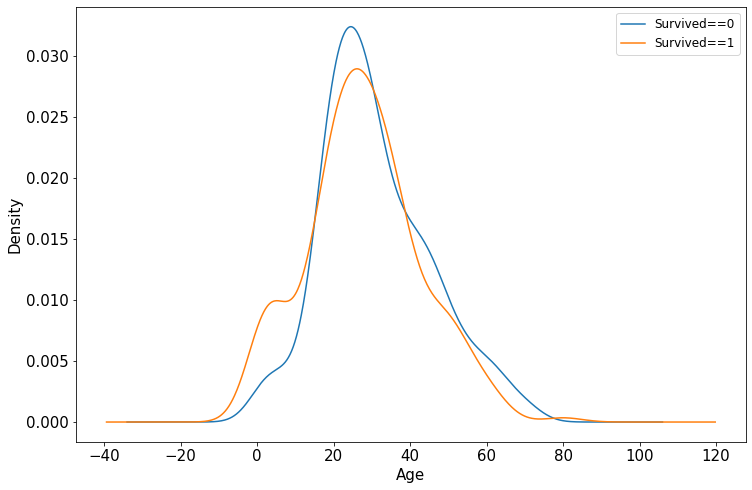

In [37]:
%matplotlib inline
%config InlineBacked.figure_format = 'png'

ax = dftrain_raw.query('Survived==0')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)
dftrain_raw.query('Survived==1')['Age'].plot(kind='density', figsize=(12,8), fontsize=15)

ax.legend(['Survived==0', "Survived==1"], fontsize=12)
ax.set_ylabel("Density", fontsize=15)
ax.set_xlabel("Age", fontsize=15)

plt.show()

Below are code for formal data pre-processing

In [38]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [39]:
dftrain_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
dftest_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
def preprocessing(df):
    """Function to preprocessing the train & test dataframe.
    Follow the tutorial but written in a shorter way.
    """

    df = pd.get_dummies(data=df, columns=['Embarked', 'Sex', "Pclass"])

    df['Age_null'] = pd.isna(df['Age']).astype('int32')
    df['Age'] = df['Age'].fillna(0) 

    df['Cabin_null'] = pd.isna(df['Cabin']).astype('int32')
    
    df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived', 'Cabin'], inplace=True)
    return df

In [57]:
x_train = preprocessing(dftrain_raw)
x_train = x_train.values # change to numpy array type
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
x_test = x_test.values
y_test = dftest_raw['Survived'].values

print(f"train shape: {x_train.shape}\ntest shape: {x_test.shape}")

train shape: (712, 14)
test shape: (179, 14)


The tutorial has 15 columns?

**2. Model Definition**

Usually there are three ways of modeling using APIs of Keras: sequential modeling using Sequential() function, arbitrary modeling using functional API, and customized modeling by inheriting base class Model.

Here we take the simplest way: sequential modeling using function Sequential().



In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(14, )))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


**3. Model Training**

There are three usual ways for model training: use internal function fit, use internal function train_on_batch, and customized training loop. Here we introduce the simplist way: using internal function fit.

In [59]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer='adam',
    metrics=['AUC']
)

In [60]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2
)

Epoch 1/30
9/9 [==============================] - 1s 46ms/step - loss: 1.5440 - auc: 0.7021 - val_loss: 1.1767 - val_auc: 0.6305
Epoch 2/30
9/9 [==============================] - 0s 7ms/step - loss: 0.8541 - auc: 0.5990 - val_loss: 0.9973 - val_auc: 0.5592
Epoch 3/30
9/9 [==============================] - 0s 6ms/step - loss: 0.7833 - auc: 0.6065 - val_loss: 0.7712 - val_auc: 0.6499
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6006 - auc: 0.7420 - val_loss: 0.6769 - val_auc: 0.6747
Epoch 5/30
9/9 [==============================] - 0s 7ms/step - loss: 0.6223 - auc: 0.7254 - val_loss: 0.6500 - val_auc: 0.6512
Epoch 6/30
9/9 [==============================] - 0s 7ms/step - loss: 0.6045 - auc: 0.7198 - val_loss: 0.6097 - val_auc: 0.7051
Epoch 7/30
9/9 [==============================] - 0s 7ms/step - loss: 0.5476 - auc: 0.7985 - val_loss: 0.5997 - val_auc: 0.7147
Epoch 8/30
9/9 [==============================] - 0s 7ms/step - loss: 0.5504 - auc: 0.7869 - val_loss: 

**4. Model Evaluation**

First, we evaluate the model performance on the traiing and validation datasets.

In [63]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib.pyplot as plt

def plot_metrics(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics)+1)

    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro--')
    plt.title("Training and validation " + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(['train_'+metric, 'val_'+metric])
    plt.show()

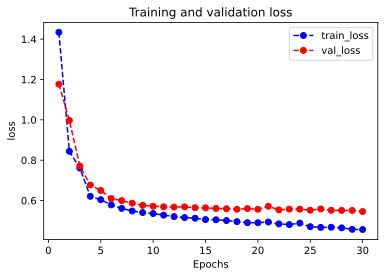

In [64]:
plot_metrics(history, 'loss')

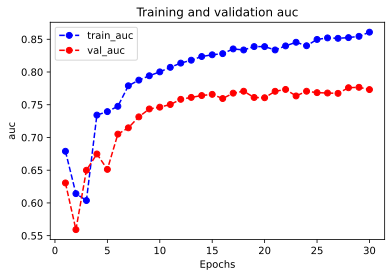

In [65]:
plot_metrics(history, 'auc')

Evaluate model performance on test set

In [69]:
evaluate_output = model.evaluate(x_test, y_test, return_dict=True)

print(evaluate_output)

6/6 [==============================] - 0s 2ms/step - loss: 0.4537 - auc: 0.8466
{'loss': 0.45365363359451294, 'auc': 0.8466064929962158}


**5. Model Application**


In [70]:
model.predict(x_test[:10])

array([[0.12217826],
       [0.63597214],
       [0.45389354],
       [0.8284844 ],
       [0.5095748 ],
       [0.6732725 ],
       [0.09004417],
       [0.7721729 ],
       [0.56162643],
       [0.160521  ]], dtype=float32)

In [72]:
model.predict(x_test[:10]) >= 0.5

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

**6. Model Saving**

The trained model could be saved through either the way of Keras or the way of original TensorFlow. The former only allows using Python to retrieve the model, while the latter allows cross-platform deployment.

The latter way is recommended to save the model.

(1) Model Saving with Keras

In [78]:
model.save('../model_weights/keras_titanic/keras_titanic_model.h5')
del model

reloaded_model = tf.keras.models.load_model("../model_weights/keras_titanic/keras_titanic_model.h5")
reloaded_model.evaluate(x_test, y_test, return_dict=True)

6/6 [==============================] - 0s 2ms/step - loss: 0.4537 - auc: 0.8466


{'auc': 0.8466064929962158, 'loss': 0.45365363359451294}

Saving the model structure

In [79]:
json_str = model.to_json()

model_json = tf.keras.models.model_from_json(json_str)

Saving the weights of model

In [80]:
reloaded_model.save_weights("../model_weights/keras_titanic/keras_titanic_model_weight.h5")

model_json = tf.keras.models.model_from_json(json_str)
model_json.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer='adam',
                   metrics=['AUC'])


# load the weights
model_json.load_weights("../model_weights/keras_titanic/keras_titanic_model_weight.h5")
model_json.evaluate(x_test, y_test, return_dict=True)

6/6 [==============================] - 0s 2ms/step - loss: 0.4652 - auc: 0.8443


{'auc': 0.8466064929962158, 'loss': 0.45365363359451294}

(2) Model Saving with Original Way of TensorFlow

In [ ]:
# Saving the weights, this way only save the tensors of the weights
model.save_weights('../data/tf_model_weights.ckpt',save_format = "tf")

In [ ]:
# Saving model structure and parameters to a file, so the model allows cross-platform deployment

model.save('../data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('../data/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)